In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math 

In [48]:
def visualize_newton_raphson(x_history, fx_history, df, f=None):
    # Create x range around the iterations for better view
    x_vals = np.linspace(min(x_history) - 1, max(x_history) + 1, 400)
    
    plt.figure(figsize=(10, 6))

    # Plot the function f(x) if provided
    if f:
        y_vals = [f(x) for x in x_vals]
        plt.plot(x_vals, y_vals, label='f(x)', color='blue')

    # Plot each iteration step
    for i in range(len(x_history) - 1):
        x = x_history[i]
        y = fx_history[i]
        slope = df(x)
        # Tangent line: y = slope * (x - x0) + y0
        tangent_x = np.linspace(x - 1, x + 1, 20)
        tangent_y = slope * (tangent_x - x) + y
        plt.plot(tangent_x, tangent_y, 'r--', label='Tangent' if i == 0 else "")
        plt.plot(x, y, 'ko')  # iteration point

    # Plot the final point
    plt.plot(x_history[-1], fx_history[-1], 'go', label='Final estimate')

    plt.axhline(0, color='black', lw=0.5)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Newton-Raphson Iteration Visualization')
    plt.legend()
    plt.grid(True)
    plt.show()

In [49]:
# def visualize_newton_raphson(x_history, fx_history, df):
#     for i in range(len(x_history)-1):
#         x_curr = x_history[i]
#         y_curr = fx_history[i]
#         slope = df(x_curr)

#         tangent_x = np.linspace(x_curr - 1, x_curr + 1, 10)
#         tangent_y = y_curr + slope * (tangent_x - x_curr)

#         plt.plot(tangent_x, tangent_y, 'r--', alpha=0.6)
#         plt.plot(x_curr, y_curr, 'ko')  # iteration point

#     plt.plot(x_history[-1], fx_history[-1], 'go', label='Root Approximation')  
#     plt.title('Newton-Raphson Method Visualization')
#     plt.xlabel('x')
#     plt.ylabel('f(x)')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

In [50]:
def newton_raphson(f, df, x0, tol=1e-7, max_iter=100):
    x = x0
    x_history = [x]
    fx_history = [f(x)]

    for i in range(max_iter):
        fx = f(x)
        dfx = df(x)
        if abs(fx) < tol:
            visualize_newton_raphson(x_history, fx_history, df)
            return x
        if dfx == 0:
            raise ValueError("Derivative is zero. No solution found.")
        x -= fx / dfx
        x_history.append(x)
        fx_history.append(fx)
    visualize_newton_raphson(x_history, fx_history, df, f)
    raise ValueError("Maximum iterations reached. No solution found.")

In [51]:
def func_one(x):
    return x**3 - 2*x**2 + 4*x - 8
def dfunc_one(x):
    return 3*x**2 - 4*x + 4

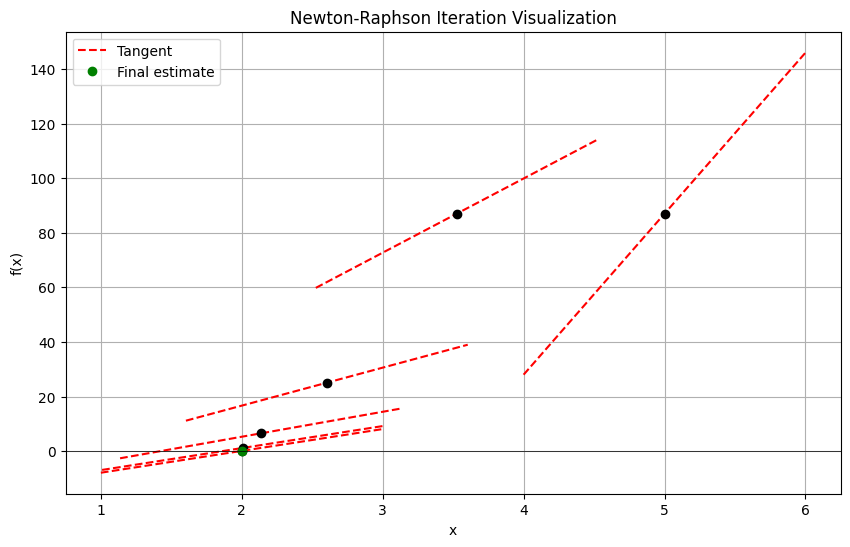

Root found: 2.000000000700921


In [ ]:
x0 = 5
try:
    root = newton_raphson(func_one, dfunc_one, x0)
    print(f"Root found: {root}")
except ValueError as e:
    print(e)

In [53]:
def func_two(x):
    return (math.e**-x) - (x*math.e**-x)
def dfunc_two(x):
    return (x*math.e**-x) - 2*math.e**-x

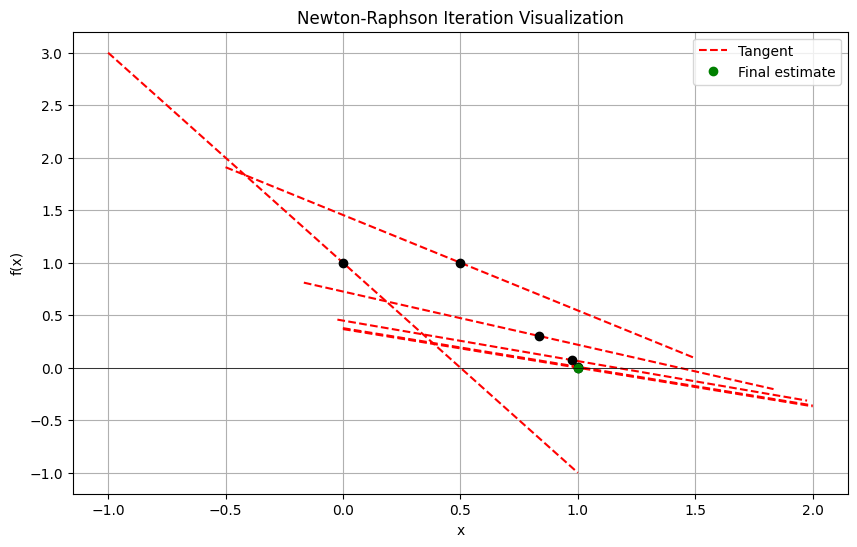

Root found: 0.9999999999999061


In [54]:
#Example usage
x0 = 0
try:
    root = newton_raphson(func_two, dfunc_two, x0)
    print(f"Root found: {root}")
except ValueError as e:
    print(e)

In [55]:
def func_three(x):
    return x*math.sin(x)+math.cos(x)
def dfunc_three(x):
    return x*math.cos(x)-math.sin(x)

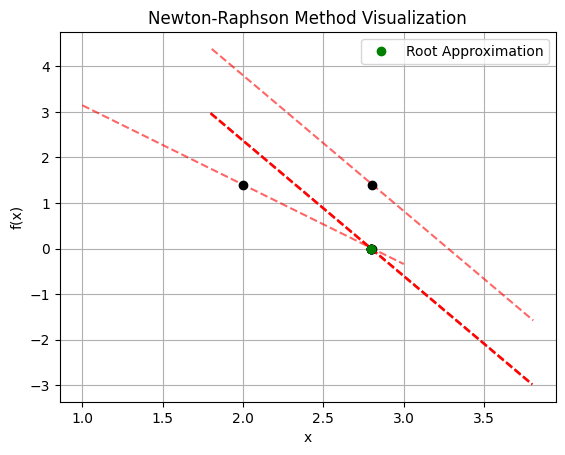

Root found: 2.7983860602572346


In [ ]:
x0 = 2
try:
    root = newton_raphson(func_three, dfunc_three, x0)
    print(f"Root found: {root}")
except ValueError as e:
    print(e)

In [22]:
def func_four(x):
    return math.sin(x) - 0.5*x
def dfunc_four(x):
    return math.cos(x) - 0.5

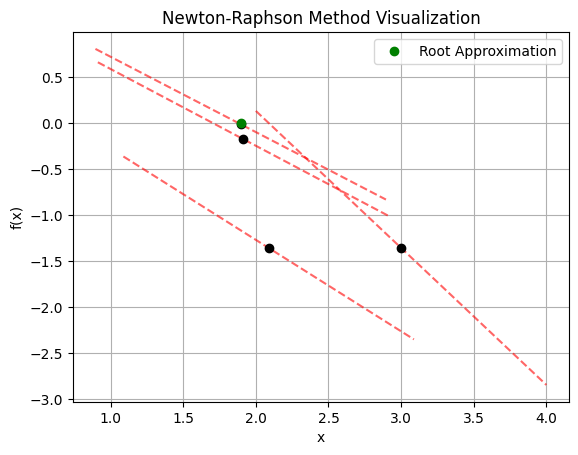

Root found: 1.895494281540574


In [23]:
x0 = 3
try:
    root = newton_raphson(func_four, dfunc_four, x0)
    print(f"Root found: {root}")
except ValueError as e:
    print(e)